# Solution 1:

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from numpy import linalg as LA

In [261]:
img_1 = Image.open("ColorPlane.jpg")
img_2 = Image.open("ColorBird.jpg")

width_1 = img_1.width
height_1 = img_1.height

width_2 = img_2.width
height_2 = img_2.height

In [262]:
col = [[250, 250, 250], [0, 0, 0], [250, 0, 0], [0, 250, 0], [0, 0, 250]]

In [263]:
feature_1 = []
feature_2 = []

pixel_1 = []
pixel_2 = []

for i in range(height_1):
    pixel_1.append([])
    for j in range(width_1):
        d = img_1.getpixel((j, i))
        pixel_1[i].append([d[0], d[1], d[2]])
        
for i in range(height_2):
    pixel_2.append([])
    for j in range(width_2):
        d = img_2.getpixel((j, i))
        pixel_2[i].append([d[0], d[1], d[2]])

pix_1 = np.array(pixel_1)
pix_2 = np.array(pixel_2)

max_r_1 = np.max(pix_1[:, 0])
max_g_1 = np.max(pix_1[:, 1])
max_b_1 = np.max(pix_1[:, 2])

max_r_2 = np.max(pix_2[:, 0])
max_g_2 = np.max(pix_2[:, 1])
max_b_2 = np.max(pix_2[:, 2])

for i in range(height_1):
    for j in range(width_1):
        d = img_1.getpixel((j, i))
        feature_1.append([j/width_1, i/height_1, d[0]/max_r_1, d[1]/max_g_1, d[2]/max_b_1])
        
for i in range(height_2):
    for j in range(width_2):
        d = img_2.getpixel((j, i))
        feature_2.append([j/width_2, i/height_2, d[0]/max_r_2, d[1]/max_g_2, d[2]/max_b_2])

In [264]:
col[labels_1[width_1*i + j]]

[0, 250, 0]

In [265]:
def k_mean_func(feature_1, feature_2, K):
    kmeans_1 = KMeans(n_clusters = K).fit(np.array(feature_1))
    labels_1 = kmeans_1.labels_

    kmeans_2 = KMeans(n_clusters = K).fit(np.array(feature_2))
    labels_2 = kmeans_2.labels_
    
    return labels_1, labels_2

In [266]:
def Gmm_func(feature_1, feature_2, K):
    gmm = GaussianMixture(n_components = K)
    label_1_gmm = gmm.fit_predict(np.array(feature_1))
    label_2_gmm = gmm.fit_predict(np.array(feature_2))
    return label_1_gmm, label_2_gmm

In [267]:
def create_pix(labels_1, labels_2, height_1, width_1, height_2, width_2, col):
    pixel_edit_1 = []
    pixel_edit_2 = []

    for i in range(height_1):
        pixel_edit_1.append([])
        for j in range(width_1):
            pixel_edit_1[i].append(col[labels_1[width_1*i + j]])

    #         if labels_1[width_1*i + j] == 1:
    #             pixel_edit_1[i].append(col[labels_1[width_1*i + j]])
    #         else:
    #             pixel_edit_1[i].append([0, 0, 0])

    for i in range(height_2):
        pixel_edit_2.append([])
        for j in range(width_2):
            pixel_edit_2[i].append(col[labels_2[width_2*i + j]])

    #         if labels_2[width_2*i + j] == 1:
    #             pixel_edit_2[i].append([250, 250, 250])
    #         else:
    #             pixel_edit_2[i].append([0, 0, 0])
    
    return pixel_edit_1, pixel_edit_2

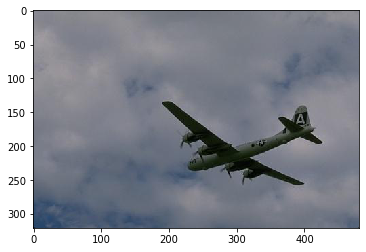

In [268]:
plt.imshow(np.array(pixel_1))

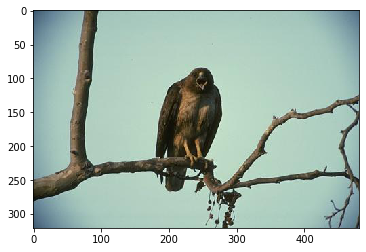

In [269]:
plt.imshow(np.array(pixel_2))

## K = 2

### K-means

In [270]:
K=2
labels_1, labels_2 = k_mean_func(feature_1, feature_2, K)
pixel_edit_1, pixel_edit_2 = create_pix(labels_1, labels_2, height_1, width_1, height_2, width_2, col)

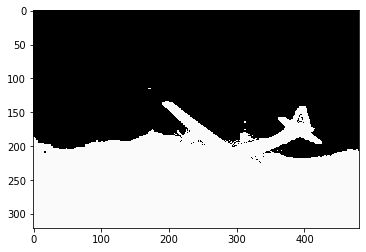

In [271]:
plt.imshow(np.array(pixel_edit_1))

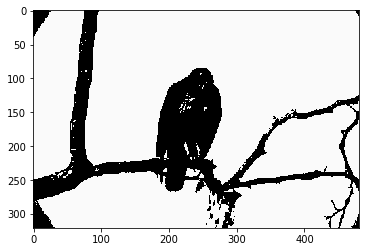

In [272]:
plt.imshow(np.array(pixel_edit_2))

### GMM

In [273]:
labels_1, labels_2 = Gmm_func(feature_1, feature_2, K)
pixel_edit_1, pixel_edit_2 = create_pix(labels_1, labels_2, height_1, width_1, height_2, width_2, col)

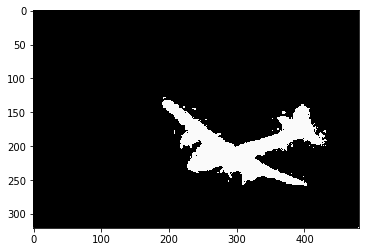

In [274]:
plt.imshow(np.array(pixel_edit_1))

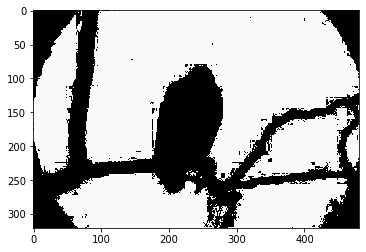

In [275]:
plt.imshow(np.array(pixel_edit_2))

## K = 3

### K-means

In [276]:
K=3
labels_1, labels_2 = k_mean_func(feature_1, feature_2, K)
pixel_edit_1, pixel_edit_2 = create_pix(labels_1, labels_2, height_1, width_1, height_2, width_2, col)

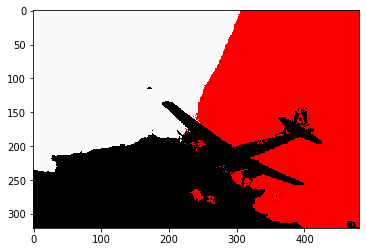

In [277]:
plt.imshow(np.array(pixel_edit_1))

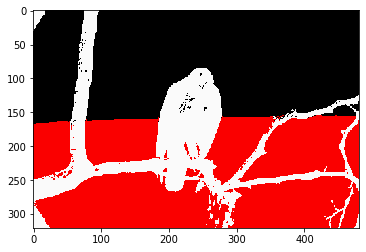

In [278]:
plt.imshow(np.array(pixel_edit_2))

### GMM

In [279]:
labels_1, labels_2 = Gmm_func(feature_1, feature_2, K)
pixel_edit_1, pixel_edit_2 = create_pix(labels_1, labels_2, height_1, width_1, height_2, width_2, col)

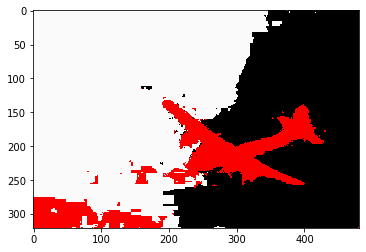

In [280]:
plt.imshow(np.array(pixel_edit_1))

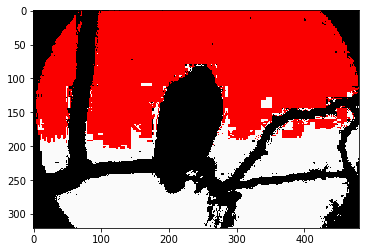

In [281]:
plt.imshow(np.array(pixel_edit_2))

## K = 4

### K-means

In [282]:
K=4
labels_1, labels_2 = k_mean_func(feature_1, feature_2, K)
pixel_edit_1, pixel_edit_2 = create_pix(labels_1, labels_2, height_1, width_1, height_2, width_2, col)

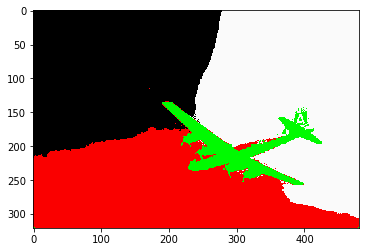

In [283]:
plt.imshow(np.array(pixel_edit_1))

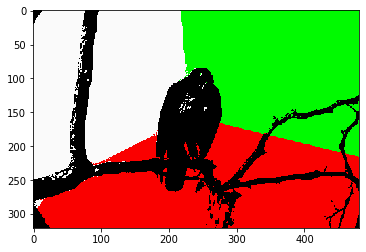

In [284]:
plt.imshow(np.array(pixel_edit_2))

### GMM

In [285]:
labels_1, labels_2 = Gmm_func(feature_1, feature_2, K)
pixel_edit_1, pixel_edit_2 = create_pix(labels_1, labels_2, height_1, width_1, height_2, width_2, col)

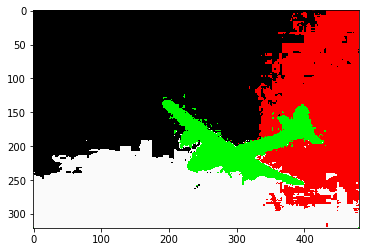

In [286]:
plt.imshow(np.array(pixel_edit_1))

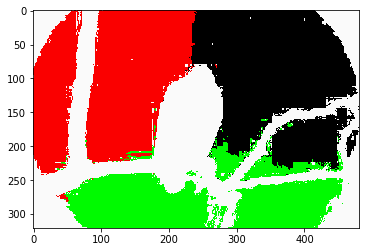

In [287]:
plt.imshow(np.array(pixel_edit_2))

## K = 5

### K-means

In [288]:
K=5
labels_1, labels_2 = k_mean_func(feature_1, feature_2, K)
pixel_edit_1, pixel_edit_2 = create_pix(labels_1, labels_2, height_1, width_1, height_2, width_2, col)

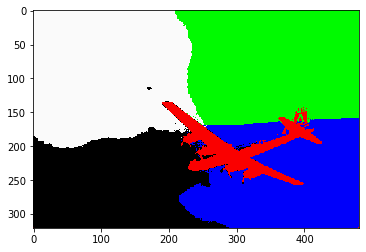

In [289]:
plt.imshow(np.array(pixel_edit_1))

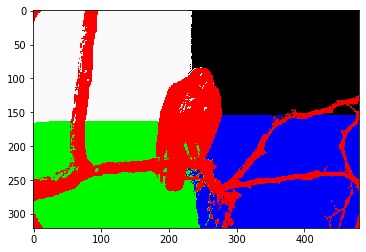

In [290]:
plt.imshow(np.array(pixel_edit_2))

### GMM

In [291]:
labels_1, labels_2 = Gmm_func(feature_1, feature_2, K)
pixel_edit_1, pixel_edit_2 = create_pix(labels_1, labels_2, height_1, width_1, height_2, width_2, col)

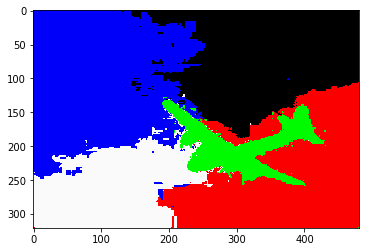

In [292]:
plt.imshow(np.array(pixel_edit_1))

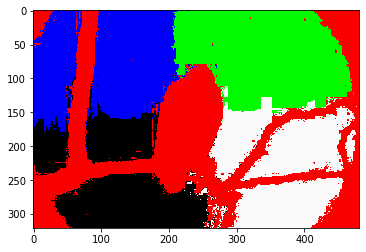

In [293]:
plt.imshow(np.array(pixel_edit_2))

## Results:
1) By comparing the results in the form of the pictures, we can notice that the segmentation carried out by the K-means clustering is cleaner and the boundaries are sharper in contrast to the segmentations achieved by the GMM based clustering. This can be mainly attributed to the fact that K-means clustering works by calculating the distance of every point to the closest mean and hence points closer to a particular mean will fall into one class while the points father off will fall into some other class. On the contrary, the GMM clustering takes the likelihood of each point into consideration and not just the distance between the points. Hence, the points which necessarily might not be close to the mean of the cluster, but might be potential outliers will also be classified into appropriate classes by taking their prior probabilities and probability densities into consideration. This tends to make the segmented image seem a little less sharp. 

But, as can be seen in the case of K=2, the plane is segmented quite distinctly in the GMM clustered image while it is poorly visible in the K-means segmented image. This goes to show us that even though the GMM clustering technique might not give sharp segmentation, the results are much more accurate as compared to the results of K-means, especially when the number of desired clusters does not match with the optimum working number of clusters for the particular dataset for K-means. 

2) Another point to notice comes up while comparing the two segmented pictures generated by the K-means clustering method. Here, we can see that the segmentation seems quite sharp and more accurate for the picture with the bird and quite the opposite for the picture with the plane in it. This could be mainly attributed to the fact that the image with the bird has two quite contrasting colors with the sky being bright and lit while the figure of the bird is pretty dark. Thus, the K-means method can easily differentiate the two contrasting clusters which are quite distinct from each other. In the image with the plane, we notice that the colors of the plane and the sky are quite close to each other, with an added disadvantage being that the sky itself has a mix of colors in a similar range. This means that the feature points might end up being quite close to each other and hence not clearly differentiable if the criteria for clustering is the distances from the mean points of the clusters. This results in the stark difference in the accuracies of the results of the K-means clustering when compared between the two images. 

This property is absent in the case of the GMM clustering method wherein even though the image might not be sharp, it is consistent for all types of images. 

### K-means clustering (working):
The K-means clustering works by the following method:
1) The mean centers are defined based on the number of clusters that the data is required to be divided into. The number of mean centers is equal to the number of clusters. These mean centers can be defined arbitrarily. 
2) The data points are classified into clusters based on their distance to each of the mean centers. Each point is classified into the cluster whose mean is closest to it. 
3) Based on the data classified into each cluster, a new mean center is calculated for each cluster.
And the cycle is repeated from step 1, thus classifying data and calculating new mean centers until there is no change in classification of any of the data points from their class in the preceding iteration.

In the above code, the specific guidelines set in the question 1 of the homework have been followed. Some of the points to take note of are mentioned below:
1) The normalised 5-dimensional feature vector is given as:
##### [pixel_colum/total_columns, pixel_row/total_rows, R-value of pixel/max_R-value_in_image, G-value of pixel/max_G-value_in_image, B-value of pixel/max_B-value_in_image].
2) The segmentation has been visualized using different distinct colors since segmentation using gray-scales was at times not easily differentiable, especially for larger K-values (number of clusters).

### GMM Clustering (working):
The GMM clustering assumes the data to be of a Gaussian Mixture Model type and performs the Estimation Maximization (EM) technique to find the optimal parameters (prior probability, mean, and covariance) for every cluster of the model. The optimal parameters are calculated using a recursive system of formulae that converge at the maximum estimation of the log-likelihood of the PDF. Here, the aim of this technique is t find clusters such that the log-likelihood of the function is maximized. This, in turn, takes the priors into consideration, thus indirectly implementing the MAP classification while classifying the data into these clusters.